### Data Preparation

Import the require libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset.

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Check the number of rows and columns in dataset.

In [3]:
print(df.shape)

(11552, 85)


### Data Wrangling

Find how many duplicate rows exist in the dataframe.

In [4]:
df.duplicated().sum()

154

Remove the duplicate rows from the dataframe.

In [5]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Find the missing values for all columns.

In [6]:
df.columns[df.isnull().any()]

Index(['OpenSource', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc',
       'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow',
       'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTim

Find out how many rows are missing in the column 'CompFreq' and 'CompTotal'.

In [7]:
print('CompTotal:', df['CompTotal'].isnull().sum())
print('CompFreq:', df['CompFreq'].isnull().sum())

CompTotal: 809
CompFreq: 206


Imputing missing values for 'CompFreq' and 'CompTotal' columns.

In [8]:
df.dropna(subset = ['CompFreq'], inplace=True)
df['CompTotal'] = df['CompTotal'].replace(np.NaN, df['CompTotal'].median())

Verify if imputing was successful.

In [9]:
print('CompTotal:', df['CompTotal'].isnull().sum())
print('CompFreq:', df['CompFreq'].isnull().sum())

CompTotal: 0
CompFreq: 0


List out the various categories in the column 'CompFreq'.

In [10]:
df.CompFreq.value_counts().index

Index(['Yearly', 'Monthly', 'Weekly'], dtype='object')

Create a new column named 'NormalizedAnnualCompensation' and fill with this logic:

If the CompFreq is Yearly then use the exising value in CompTotal

If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)

If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)


In [11]:
anncomp=[]
def NAC():
    for x,y in zip(df['CompFreq'], df['CompTotal']):
        if x=='Monthly':
            anncomp.append(y*12)
        elif x=='Weekly':
            anncomp.append(y*52)
        else:
            anncomp.append(y)
NAC()
          
df['NormalizedAnnualCompensation']=anncomp
df[['NormalizedAnnualCompensation']]

,NormalizedAnnualCompensation
0,61000.0
1,138000.0
2,90000.0
3,348000.0
4,90000.0
...,...
11546,9600.0
11547,130000.0
11548,74400.0
11549,105000.0


Check the number of rows and columns in dataset after data wrangling.

In [12]:
print(df.shape)

(11192, 86)


### Data Analysis

The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.
This assumes 12 working months and 50 working weeks.

Determine how the data in 'ConvertedComp' is distributed.

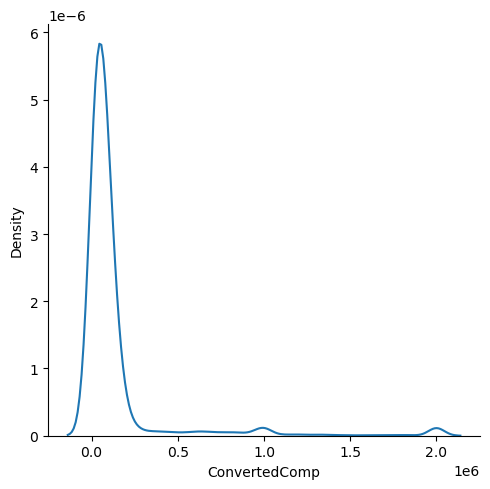

In [13]:
sns.displot(df['ConvertedComp'], kind="kde")

In [14]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out if outliers exist in the column 'ConvertedComp' using a box plot.

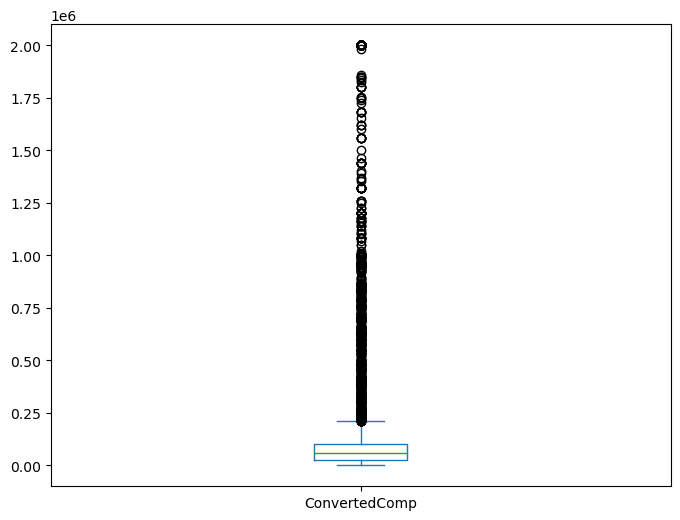

In [15]:
df_cv = pd.DataFrame(data=df['ConvertedComp'])
df_cv.plot(kind='box', figsize=(8,6))
plt.show()

Create a new dataframe by removing the outliers from the ConvertedComp column.

In [16]:
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)

In [17]:
Lbound = df['ConvertedComp'].quantile(0.25) - 1.5*IQR
Lbound = max(Lbound, df['ConvertedComp'].min())
Lbound

0.0

In [18]:
Ubound = df['ConvertedComp'].quantile(0.75) + 1.5*IQR
Ubound

209698.0

In [19]:
df2 = df[df['ConvertedComp'] <= Ubound]

Check the summary after removing outlier.

In [20]:
df2['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

Check the number of row after removing outlier.

In [21]:
print(df2.shape)

(9703, 86)


Determine how the data in 'Age' is distributed.

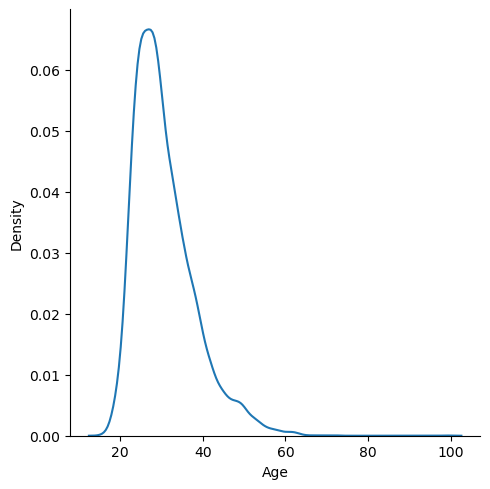

In [22]:
sns.displot(df2['Age'], kind="kde")

In [23]:
df2['Age'].describe()

count    9493.000000
mean       30.695860
std         7.346625
min        16.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        99.000000
Name: Age, dtype: float64

Find the correlation between 'Age' and 'ConvertedComp' after removing the outlier.

In [24]:
df2['Age'].corr(df2['ConvertedComp'])

0.4018213997122177

Show the proportion of Gender.

In [25]:
df2['Gender'].value_counts()

Man                                                            8895
Woman                                                           642
Non-binary, genderqueer, or gender non-conforming                52
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

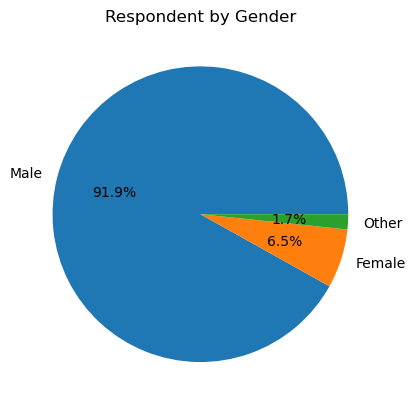

In [26]:
# create a dictionary to map gender categories to 'Male', 'Female', or 'Other'
gender_dict = {'Man': 'Male', 'Woman': 'Female'}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict.get(x, 'Other'))

# create a Series with the counts for the three categories
gender_counts = df['Gender'].value_counts()

# calculate the percentages for the three categories
gender_percents = gender_counts/gender_counts.sum() * 100

# create a pie chart with percentages for 'Male', 'Female', and 'Other'
fig, ax = plt.subplots()
ax.pie(gender_percents, labels=gender_percents.index, autopct='%1.1f%%')
ax.set_title('Respondent by Gender')
plt.show()

### Data Visualization

In this section, the data set is obtained in the form of an RDBMS.

In [27]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-06-02 10:00:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.2'

m4_survey_data.sqli 100%[===================>]  34.98M  3.65MB/s    in 9.7s    

2023-06-02 10:00:54 (3.61 MB/s) - 'm4_survey_data.sqlite.2' saved [36679680/36679680]



In [28]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [29]:
QUERY = """
SELECT LanguageWorkedWith, count(*) as c1
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY c1 DESC
LIMIT 5
"""
df1 = pd.read_sql_query(QUERY, conn)
df1.head()

,LanguageWorkedWith,c1
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


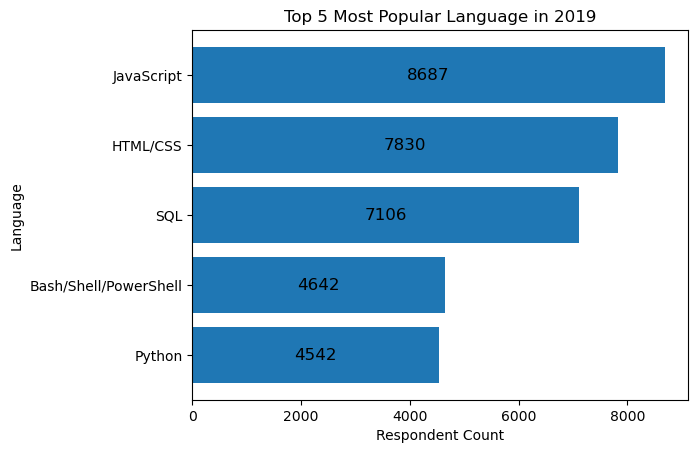

In [30]:
df1_sorted = df1.sort_values('c1')
y_axis = df1_sorted['LanguageWorkedWith']
x_axis = df1_sorted['c1']

plt.barh(y_axis, x_axis)

for i, v in enumerate(x_axis):
    plt.text(v/2, i, str(v), color='black', fontsize=12, ha='center', va='center')
    
plt.title('Top 5 Most Popular Language in 2019')
plt.ylabel('Language')
plt.xlabel('Respondent Count')
plt.show()

In [31]:
QUERY = """
SELECT LanguageDesireNextYear, count(*) as c1
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY c1 DESC
LIMIT 5
"""
df2 = pd.read_sql_query(QUERY, conn)
df2.head()

,LanguageDesireNextYear,c1
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


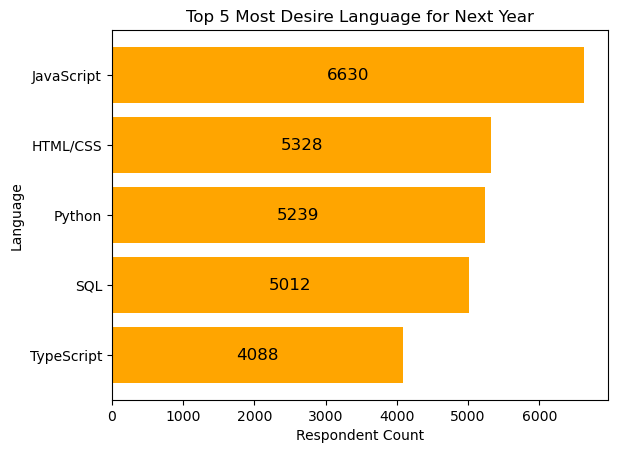

In [32]:
df2_sorted = df2.sort_values('c1')
y_axis = df2_sorted['LanguageDesireNextYear']
x_axis = df2_sorted['c1']

plt.barh(y_axis, x_axis, color='orange')

for i, v in enumerate(x_axis):
    plt.text(v/2, i, str(v), color='black', fontsize=12, ha='center', va='center')
    
plt.title('Top 5 Most Desire Language for Next Year')
plt.ylabel('Language')
plt.xlabel('Respondent Count')
plt.show()

In [33]:
QUERY = """
SELECT DatabaseWorkedWith, count(*) as c1
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY c1 DESC
LIMIT 5
"""
df3 = pd.read_sql_query(QUERY, conn)
df3.head()

,DatabaseWorkedWith,c1
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


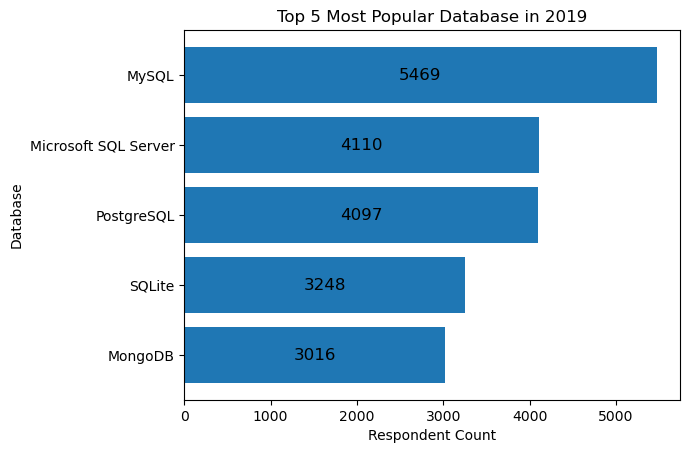

In [34]:
df3_sorted = df3.sort_values('c1')
y_axis = df3_sorted['DatabaseWorkedWith']
x_axis = df3_sorted['c1']

plt.barh(y_axis, x_axis)

for i, v in enumerate(x_axis):
    plt.text(v/2, i, str(v), color='black', fontsize=12, ha='center', va='center')
    
plt.title('Top 5 Most Popular Database in 2019')
plt.ylabel('Database')
plt.xlabel('Respondent Count')
plt.show()

In [35]:
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as c1
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY c1 DESC
LIMIT 5
"""
df4 = pd.read_sql_query(QUERY, conn)
df4.head()

,DatabaseDesireNextYear,c1
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


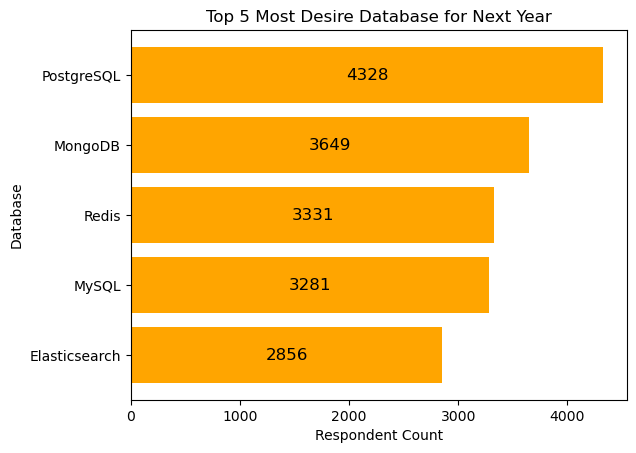

In [36]:
df4_sorted = df4.sort_values('c1')
y_axis = df4_sorted['DatabaseDesireNextYear']
x_axis = df4_sorted['c1']

plt.barh(y_axis, x_axis, label='edge', color='orange')

for i, v in enumerate(x_axis):
    plt.text(v/2, i, str(v), color='black', fontsize=12, ha='center', va='center')
    
plt.title('Top 5 Most Desire Database for Next Year')
plt.ylabel('Database')
plt.xlabel('Respondent Count')
plt.show()

In [37]:
conn.close()